In [ ]:
import torch

print(torch.__version__)

2.6.0+cu124


In [1]:
class Env:
    dots = 0
    grid = [0]
    boxes = [0]
    def clear_screen(self):
        import os
        os.system('cls' if os.name == 'nt' else 'clear')

    def __init__(self,dots):
        self.dots = dots
        self.boxes = [0]*(dots-1)*(dots-1)
        self.grid = [0]*2 * dots *(dots - 1)

    def step(self,action,turn):
        self.grid[action] = 1
        rows,x = 0,0
        reward = 0.0
        rows = (action)//(2*self.dots-1)
        x = (action)%(2*self.dots-1)
        #print(rows,x,action,turn)
        if(x >= 0 and x<= self.dots-2):	#move is horizontal !
            # no. of  row == col
            #possible boxes index = [(col-1) or (col) ]* (gridsize-1) + x;
            #for col-1 : check move, (row-1)(2*gridsize - 1) + x, move - gridsize, move - gridsize + 1
            #for col : check move, (row+1)(2*gridsize -1)+x, move + gridsize, move+gridsize -1
            if(rows !=0): #for col - 1
                if(not (self.grid[action]==0 or self.grid[(rows-1)*(2*self.dots-1)+x]==0 or self.grid[action-self.dots]==0 or self.grid[action-self.dots+1]==0)):
                    index = (rows-1)*(self.dots -1) + x
                    #print(index)
                    self.boxes[index] = turn
                    reward = turn
            if(rows != self.dots -1): # for col
                if(not(self.grid[action]==0 or self.grid[(rows+1)*(2*self.dots-1)+x]==0 or self.grid[action+self.dots]==0 or self.grid[action+self.dots-1]==0)):
                    #print(rows)
                    index = rows*(self.dots-1) +x
                    self.boxes[index] = turn
                    reward = turn
        else:   #move is vertical ~
		#rows = col+1
            rows += 1
            x = action - (rows*(self.dots-1) + (rows-1)*(self.dots))
            #possible boxes index = (row-1) *(gridsize -1) + (x or x-1)
            #for x-1 : check move, move-1, move - gridsize , move + gridsize - 1
            #for x : check move,move+1, move - (gridsize -1), move + gridsize

            if(x != 0): #for x-1
                if(not(self.grid[action]==0 or self.grid[action-1]==0 or self.grid[action-(self.dots)]==0 or self.grid[action+self.dots-1]==0)):
                    index = (rows-1)*(self.dots-1)+x-1
                    self.boxes[index] = turn
                    reward = turn
            if(x != self.dots -1): #for x
                #print(x)
                if(not(self.grid[action]==0 or self.grid[action+1]==0 or self.grid[action-self.dots+1]==0 or self.grid[action+self.dots]==0)):
                    index = (rows-1)*(self.dots-1)+x
                    self.boxes[index] = turn
                    reward = turn

        return reward

    def render(self):
        #self.clear_screen() #clear screen
        boxindex = 0
        gridindex = 0

        for i in range(self.dots*self.dots):
            print("\033[42m  \033[m",end='')
            if((i+1)%self.dots == 0):
                print('\n',end='')
                if(i == self.dots*self.dots -1):
                    break
                for j in range(self.dots):
                    if(self.grid[gridindex] == 1):
                        print("\033[47m  \033[m",end='')
                    else:
                        print(f"\033[40m{gridindex:2d}\033[m",end='')
                    gridindex += 1
                    #print(gridindex,end='')
                    if(j<self.dots-1):
                        #print(boxindex)
                        box = self.boxes[boxindex]
                        boxindex += 1
                        if(box == 1):
                            print("\033[41m  \033[m",end='')
                        elif(box == -1):
                            print("\033[44m  \033[m",end='')
                        else:
                            print("\033[100m  \033[m",end='')
                print("\n",end='')
                continue
            if(self.grid[gridindex] == 1):
                print("\033[47m  \033[m",end='')
            else:
                print(f"\033[40m{gridindex:2d}\033[m",end='')
            gridindex += 1
        print('\n')

    def gameover(self):
        for i in range(len(self.grid)):
            if(self.grid[i]==0):
                return False
        return True

    def reset(self):
        self.grid = [0]*(2*self.dots*(self.dots-1))
        self.boxes = [0]*(self.dots-1)*(self.dots-1)
        return self.grid.copy()

    def action_space(self):
      actions = []
      for i in range(len(self.grid)):
        if(self.grid[i] == 0):
          actions.append(i)
      return actions

    @classmethod
    def from_state(cls,dots, state):
        env = cls(dots)
        g_len = len(env.grid)
        b_len = len(env.boxes)
        env.grid = list(state[:g_len])
        env.boxes = list(state[g_len:g_len + b_len])
        env.turn = state[-1]
        return env
    @classmethod
    def Gameover(cls,dots, state):
        env = cls(dots)
        g_len = len(env.grid)
        b_len = len(env.boxes)
        env.grid = list(state[:g_len])
        env.boxes = list(state[g_len:g_len + b_len])
        env.turn = state[-1]
        return env.gameover()

    def clone(self):
        env = Env(self.dots)
        for i in range(len(self.grid)):
            env.grid[i] = self.grid[i]
            if (i < len(self.boxes)):
                env.boxes[i] = self.boxes[i]
        return env

#testing environment
'''
obj = Env(4)
turn = -1
while(not obj.gameover()):
  if turn ==-1:
    move = input("enter move")
    reward = obj.step(int(move),turn)
    obj.render()
  elif turn  == 1:
    move = obj.minmax(turn)
    reward = obj.step(move,turn)
    obj.render()
  if reward == 0:
    turn = -turn
'''

'\nobj = Env(4)\nturn = -1\nwhile(not obj.gameover()):\n  if turn ==-1:\n    move = input("enter move")\n    reward = obj.step(int(move),turn)\n    obj.render()\n  elif turn  == 1:\n    move = obj.minmax(turn)\n    reward = obj.step(move,turn)\n    obj.render()\n  if reward == 0:\n    turn = -turn\n'

In [ ]:
#testing environment
obj = Env(4)
turn = 1
while(not obj.gameover):
  if turn ==1:
    move = input("enter move")
    reward = obj.step(int(move),turn)
    obj.render()
  elif turn  == -1:
    move = obj.minmax(turn)
    reward = obj.step(move,turn)
    obj.render()
  if reward == 0:
    turn = -turn

del(obj)

In [ ]:
print("Tabular Q-Learning")

Tabular Q-Learning


In [ ]:
import random
from collections import defaultdict
import numpy as np
import pickle
from env.env import Env
from agents.minmax import Play as greed
class qt:
    def train(self,dots,epochs):
        env = Env(dots)
        Q = defaultdict(lambda: np.zeros(len(env.grid)))
        discount_factor = 0.7
        learning_rate = 0.1
        #epochs  = 1000000
        for episode in range(epochs+1):
            turn = random.choice([1,-1])
            state = tuple(env.grid + env.boxes + [turn])
            while not env.gameover():
                valid_actions = env.action_space()
                epsilon = max(0.01,0.995**(episode))  # Exploration rate
                q_state_action = 0
                if random.random() < epsilon:
                    action = random.choice(valid_actions) # Explore
                else:
                    if turn == 1:
                        valid_q_values = [Q[state][a] for a in valid_actions]
                        action = valid_actions[np.argmax(valid_q_values)] # Exploit
                        q_state_action = Q[state][action]
                    else:
                        q_values = Q[state].copy()
                        valid_q_values = [Q[state][a] for a in valid_actions]
                        action = valid_actions[np.argmin(valid_q_values)]
                        q_state_action = q_values[action]

                reward= float(env.step(action,turn))
                if(reward == 0):
                    turn = -turn
                if(env.gameover()):
                    reward = sum(env.boxes)
                    best_q_next = reward
                else:
                    next_state = tuple(env.grid + env.boxes+[turn])
                    valid_actions_next = env.action_space()
                    best_q_next = 0
                    if turn == 1:
                        valid_q_values = [Q[next_state][a] for a in valid_actions_next]
                        best_q_next = np.max(valid_q_values) # Exploit
                    else:
                        valid_q_values = [Q[next_state][a] for a in valid_actions_next]
                        best_q_next = np.min(valid_q_values) # Exploit

                Q[state][action] += learning_rate * (reward + discount_factor * best_q_next - q_state_action)
                #print(best_q_next)

            env.reset()
            if(episode%1000 == 0):
                print(f"no of q values stored: {len(Q)} ,episodes : {episode}")

        with open(f"trained_models/Q{dots}.pkl", "wb") as f:
            pickle.dump(dict(Q),f)
        #print(Q)
        print(f"training finished, model stored in trained_models/Q{dots}.pkl")

class Play:
   def play(self,env,turn,secs=0):
        dots = env.dots
        Q = defaultdict(lambda: np.zeros(len(env.grid)))
        try:
            with open(f"trained_models/Q{dots}.pkl","r") as f:
                Q = defaultdict(lambda: np.zeros(len(env.grid)), pickle.load(f))
        except Exception:
            #print("Please train the model first, playing randomnly now")
            greedy = greed()
            return greedy.play(env,turn)
        state = tuple(env.grid + env.boxes + [turn])
        valid_actions = env.action_space()
        valid_q_values = [Q[state][a] for a in valid_actions]
        action = valid_actions[np.argmax(valid_q_values)]
        return action


9.0 0
-1.0 50000
1.0 100000
-3.0 150000
3.0 200000
5.0 250000
5.0 300000
5.0 350000
-7.0 400000
9.0 450000
3.0 500000
3.0 550000
3.0 600000
9.0 650000
5.0 700000
1.0 750000
9.0 800000
1.0 850000
-1.0 900000
3.0 950000


ValueError: mount failed

In [ ]:
import pickle
with open('Q.pkl', 'wb') as f:
    pickle.dump(dict(Q),f)
from google.colab import files
files.download('Q.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
with open('/content/drive/MyDrive/Q.pkl', 'wb') as f:
    pickle.dump(dict(Q), f)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("NOW WORKING ON DEEP Q-Learning")

# so what i actually do is start an episode,get state and choose epsilon greedy action from q(state), run step and get next_state, reward to compute
# Q(s,a) = Q(s,a) + learning_rate * (reward + discount_factor * max(Q(s')) - Q(s,a))
# and move on to next state until episode ends and keep on doing it until epochs

# but here its a neural network
# in neural network we have loss functions and adam optimizer
# basically my update is slowly updating my q(s,a) towards actual reward by moving it slowly towards reward+discount*q'(s',a') using gradient descent
# so my loss function in tabular q-learning is (reward+discount*q'(s',a')-q(s,a)), what should it be in nn? maybe square of it? but why not just linear
# and i think I can pass in my loss function to adam optimizer and run optimizer after every step just like in tabular

NOW WORKING ON DEEP Q-Learning


In [ ]:
##initializing neural network
import torch.nn as nn
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim)
        )
    def forward(self, x):
        return self.model(x)


In [ ]:
##initializing neural network

import random
import torch
import torch.nn as nn
from env.env import Env
class NN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128,128),
            nn.ReLU(),
            nn.Linear(128, output_dim)
        )
    def forward(self, x):
        return self.model(x)
##training deepQ with self play

class dqn:
  def train(self,dots,epochs):
    discount_factor = 0.65
    env = Env(dots)
    state = tuple(env.grid + env.boxes+[1])
    input_dim = len(state)
    output_dim = len(env.grid)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = NN(input_dim, output_dim).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    for episode in range(epochs):
      turn = 1
      reward = 0
      best_q_next = 0
      q_state_action = 0
      while(not env.gameover()):
        state = tuple(env.grid + env.boxes+[turn])
        state_tensor = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)
        q_state = model.forward(x=state_tensor).squeeze()
        valid_actions = env.action_space()
        epsilon = max(0.01,0.1*(0.995**(episode)))  # Exploration rate
        q_state_action = 0
        if random.random() < epsilon:
            action = random.choice(valid_actions) # Explore
            q_state_action = q_state[action]
        else: #Exploit
          valid_q_values = torch.tensor([q_state[a] for a in valid_actions],device=device)
          if turn == 1:
            action = valid_actions[torch.argmax(valid_q_values)] # Exploit
            q_state_action = q_state[action]
          else:
            action = valid_actions[torch.argmin(valid_q_values)] # Exploit
            q_state_action = q_state[action]

        reward= float(env.step(action,turn))/len(env.boxes)
        if(reward == 0):
          turn = -turn
        if(env.gameover()):
           reward = sum(env.boxes)
           best_q_next = reward
        else :
          next_state = tuple(env.grid + env.boxes+[turn])
          next_state_tensor = torch.tensor(next_state, dtype=torch.float32, device=device).unsqueeze(0)
          q_next_state = model.forward(x=next_state_tensor).squeeze()
          valid_actions_next = env.action_space()
          best_q_next = 0
          if valid_actions_next:
            valid_q_values = torch.tensor([q_next_state[a] for a in valid_actions_next],device=device)
            if turn == 1:
              best_q_next = torch.max(valid_q_values)
            else:
              best_q_next = torch.min(valid_q_values)
        loss = (reward + discount_factor * best_q_next - q_state_action)**2
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

      env.reset()
      if(episode%10000 == 0):
        print("{episode} epochs done")
    print("training done")
    torch.save(model.state_dict(), f"dqn{dots}.pth")
    print(f"model saved at trained_models/dqn{dots}.pth")


class Play:
   def play(self,env,turn,secs=0):
      dots = env.dots
      state = tuple(env.grid + env.boxes + [turn])
      input_dim = len(state)
      output_dim = len(env.grid)
      device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
      model = NN(input_dim, output_dim).to(torch.device(device))
      try:
        model.load_state_dict(torch.load(f"trained_models/dqn{dots}.pth", map_location=torch.device(device)))
      except FileNotFoundError:
          print("Please train the model first, playing randomnly now")
      state_tensor = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)
      with torch.no_grad():
        q_values = model(state_tensor).squeeze()
        valid_actions = env.action_space()
        valid_q_values = torch.tensor([q_values[a] for a in valid_actions],device=device)
        if turn == 1:
          action = valid_actions[torch.argmax(valid_q_values).item()]
        else:
          action = valid_actions[torch.argmin(valid_q_values).item()]

      return action


AttributeError: partially initialized module 'torch._dynamo' has no attribute 'external_utils' (most likely due to a circular import)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Save
torch.save(model.state_dict(), '/content/drive/MyDrive/dqn_dotgame.pth')
# Load
from google.colab import files
files.download('/content/drive/MyDrive/dqn_dotgame.pth')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
##so both my Qtable and DeepQ have been trained
# now letting them play against each other and plotting results
from collections import defaultdict
import numpy as np
import pickle
import random
device = 'cpu'
env = Env(4)
state = tuple(env.grid + env.boxes)
input_dim = len(state)
output_dim = len(env.grid)
model = DQN(input_dim, output_dim).to(torch.device('cpu'))
#model.load_state_dict(torch.load('/content/drive/MyDrive/dqn_dotgame.pth'))
model.load_state_dict(torch.load("/content/drive/MyDrive/dqn_dotgame.pth", map_location=torch.device('cpu')))

with open("/content/drive/MyDrive/Q.pkl", "rb") as f:
    Q = defaultdict(lambda: np.zeros(len(env.grid)), pickle.load(f))

model.eval()
wins_Qdeep1=0
wins_Qtable=0
draw_deep1=0
N= 1000000
#let deep q play as player 1 first
for games in range(N):
  env.reset()
  turn = 1
  total_reward = 0
  while(not env.gameover()):
    state = tuple(env.grid + env.boxes)
    if turn == 1:
      state_tensor = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)
      with torch.no_grad():
        q_values = model(state_tensor).squeeze()
        #print(q_values)
        valid_actions = env.action_space()
        valid_q_values = torch.tensor([q_values[a] for a in valid_actions],device=device)
        action = valid_actions[torch.argmax(valid_q_values).item()]
        #print(action)
    else:
      valid_actions = env.action_space()
      action = random.choice(valid_actions)
      #valid_q_values = [Q[state][a] for a in valid_actions]
      #action = valid_actions[np.argmin(valid_q_values)]

    reward = float(env.step(action,turn))
    #env.render()
    total_reward += reward
    if(reward == 0):
      turn = -turn
  if(total_reward>0):
    wins_Qdeep1 += 1
  elif(total_reward<0):
    wins_Qtable += 1
  else:
    draw_deep1 += 1

# tableQ plays as player 1
wins_Qdeep = 0
wins_Qtable1 = 0
draw_table1 = 0
for games in range(N):
  env.reset()
  turn = 1
  total_reward = 0
  while(not env.gameover()):
    state = tuple(env.grid + env.boxes)
    if turn == -1:
      valid_actions = env.action_space()
      action = random.choice(valid_actions)
      ''' state_tensor = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)
      with torch.no_grad():
        q_values = model(state_tensor).squeeze()
        print(q_values)
        valid_actions = env.action_space()
        valid_q_values = torch.tensor([q_values[a] for a in valid_actions],device=device)
        action = valid_actions[torch.argmin(valid_q_values).item()]
        print(action) '''
    else:
      q_values = Q[state]
      valid_actions = env.action_space()
      valid_q_values = [Q[state][a] for a in valid_actions]
      action = valid_actions[np.argmax(valid_q_values)]

    reward = float(env.step(action,turn))
    total_reward += reward
    if(reward == 0):
      turn = -turn
  if(total_reward>0):
    wins_Qdeep += 1
  elif(total_reward<0):
    wins_Qtable1 += 1
  else:
    draw_table1 += 1

print(wins_Qdeep1,wins_Qtable,draw_deep1)
print(wins_Qdeep,wins_Qtable1,draw_table1)

504154 495846 0
896683 103317 0


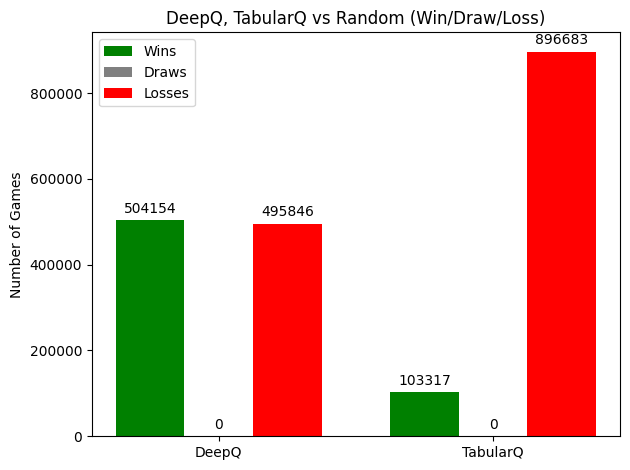

In [ ]:
# bar plot to compare models
import matplotlib.pyplot as plt
import numpy as np

# Stats
labels = ["DeepQ", "TabularQ"]

wins = [wins_Qdeep1, wins_Qtable1]
losses = [wins_Qtable, wins_Qdeep]
draws = [draw_deep1, draw_table1]

x = np.arange(len(labels))  # label locations
width = 0.25  # width of each bar

# Plot
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, wins, width, label='Wins', color='green')
rects2 = ax.bar(x, draws, width, label='Draws', color='gray')
rects3 = ax.bar(x + width, losses, width, label='Losses', color='red')

# Labeling
ax.set_ylabel('Number of Games')
ax.set_title('DeepQ, TabularQ vs Random (Win/Draw/Loss)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Show numbers on top of bars (optional)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()

In [ ]:
#monte carlo

In [ ]:
#now monte carlo tree search
import math
import random
import time
import pickle
class Node:
  def __init__(self,env,state,turn,parent=None,action=None,position=None):
    self.env = env
    self.state = state
    self.turn = turn
    self.position = position
    self.parent = parent
    self.action = action
    self.children = []

    self.total_reward = 0
    self.visits = 0


  def is_expanded(self):
    return (len(self.children) == len(self.env.action_space()))

  def expand(self):
    for action in self.env.action_space():
      new_env = self.env.copy()
      reward = new_env.step(action,self.turn)
      if reward == 0:
        new_turn = -self.turn
      else:
        new_turn = self.turn
      new_state = tuple(new_env.grid + new_env.boxes + [new_turn])
      if(new_state in self.position):
        new_node = self.position[new_state]
      else:
        new_node = Node(new_env,new_state,new_turn,self,action,self.position)
        self.position[new_state] = new_node
        self.children.append(new_node)

  def best_child(self,c_param=1.4):
    values = [
            (child.total_reward / (child.visits + 1e-8)) +
            c_param * math.sqrt(math.log(self.visits + 1) / (child.visits + 1e-8))
            for child in self.children
        ]
    if self.turn == 1:
      return self.children[values.index(max(values))]
    else:
      return self.children[values.index(min(values))]

class MCTS:
  def __init__(self,root,env,turn):
    state = tuple(env.grid + env.boxes + [turn])
    self.position = {}
    self.root = Node(env,state,turn,self.position)
    self.turn = turn
    self.env = env


  def think(self,secs):
    start_time = time.time()
    end_time = time.time()
    while(end_time - start_time < secs):
      node = self.root
      turn = node.turn
      env = node.env.copy()
      reward = node.total_reward
      #what i needed to do is either find the best node or expand node to simulate and get rewards for backpropagation
      if(not node.env.gameover()):
        while(node.children and node.is_expanded()):
          node = node.best_child()

        if(not node.children):
          node.expand()
          node = random.choice(node.children)
        reward = self.simulate(node)

      self.backpropagate(node,reward)
      end_time = time.time()

  def train(self,epochs):
    for i in range(epochs):
      node = self.root
      turn = node.turn
      env = node.env.copy()
      reward = node.total_reward
      #what i needed to do is either find the best node or expand node to simulate and get rewards for backpropagation
      if(not node.env.gameover()):
        while(node.children and node.is_expanded()):
          node = node.best_child()

        if(not node.children):
          node.expand()
          node = random.choice(node.children)
        reward = self.simulate(node)
      self.backpropagate(node,reward)

  def simulate(self,node):
    env = node.env.copy()
    turn = node.turn
    total_reward = 0
    while(not env.gameover()):
      action = random.choice(env.action_space())
      reward = float(env.step(action,turn))
      if(reward == 0):
        turn = -turn
      total_reward+=reward
    return total_reward

  def backpropagate(self,node,reward):
    while(node):
      node.total_reward += reward
      node.visits += 1
      reward = -reward
      node = node.parent

  def computer_move(self,secs):
    self.think(secs)
    best_node = self.root.best_child()
    self.root = best_node
    return best_node.action

env = Env(dots=4)
mcts = MCTS(env,1)
mcts.train(epochs=10)
with open("mcts.pkl", "wb") as f:
    pickle.dump(mcts, f)

In [ ]:
import torch.nn as nn
class NN:
  def __init__(self,input_dim=24+9+1,output_dim=24+1):
    super().__init():
      self.model = nn.Sequential(
          nn.Linear(input_dim, 128),
          nn.ReLU(),
          nn.Linear(128, 128),
          nn.ReLU(),
      )
    self.policy_head = nn.Linear(128, output_dim)
    self.value_head = nn.Linear(128, 1)

  def predict(self,input):
    network = self.model(input)
    return self.policy_head(network),self.value_head(network)


In [ ]:
#now alphazero

In [6]:
import torch
import torch.optim as optim
import numpy as np
import torch.nn as nn
import math
import random
import time
from collections import deque

#from env.env import Env
class NN(nn.Module):  # Inherit properly
  def __init__(self, input_dim,output_dim):
        super(NN, self).__init__()  # Correct super call
        self.model = nn.Sequential(
        nn.Linear(input_dim, 128),
        nn.ReLU(),
        nn.Linear(128, 128),
        nn.ReLU(),
        nn.Linear(128,128),
        nn.ReLU()
        )
        self.policy_head = nn.Linear(128, output_dim)
        self.value_head = nn.Linear(128, 1)

  def forward(self,x):
    network = self.model(x)
    return self.policy_head(network),self.value_head(network)

class Node:
  def __init__(self,dots,state,parent=None,action=None):
    self.dots = dots
    self.state = state
    self.parent = parent
    self.action = action
    self.children = {}
    self.N = {}
    self.total_visits = 0
    self.W = {}


  def is_expanded(self):
    return (len(self.children) == len(Env.from_state(self.dots,self.state).action_space()))

  def expand(self):
    turn = self.state[-1]
    env = Env.from_state(self.dots,self.state)
    for action in env.action_space():
      new_env = env.clone()
      reward = new_env.step(action,turn)
      new_turn = 0
      if reward == 0:
        new_turn = -turn
      else :
        new_turn = turn
      self.W[action] = 0
      self.N[action] = 0
      state = tuple(new_env.grid + new_env.boxes +[new_turn])
      child = Node(self.dots,state,parent=self,action=action)
      self.children[action]=child

  def best_child(self,model,c_param=1.2,training=True):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    policy,_ = model(torch.tensor(self.state, dtype=torch.float32, device=device).unsqueeze(0))
    policy = policy.squeeze(0)
    policy = policy.tolist()
    #print(policy)
    #policy = policy.detach()
    grid = 2 *self.dots*(self.dots-1)
    if training == True:
      alpha = 0.3
      epsilon = 0.25
      noise = np.random.dirichlet([alpha] * grid)
      for i in range(grid):
        policy[i] = (1 - epsilon) * policy[i] + epsilon * noise[i]

    utility = [0]*(grid)
    for action in range(grid):
      if action not in self.N.keys():
        utility[action] = self.state[-1]*0.005
      else:
        Q_s_a = self.W[action]/(self.N[action]+1e-8)
        U_s_a = c_param*policy[action]*math.sqrt(self.total_visits)/(1+self.N[action])
        utility[action] = Q_s_a + U_s_a
    valid_actions = Env.from_state(self.dots,self.state).action_space()
    best = random.choice(valid_actions)
    #print(utility)
    turn = self.state[-1]
    if turn == 1:
      max = utility[best]
      for action in valid_actions:
        if utility[action] > max:
          max = utility[action]
          best = action
    elif turn == -1:
      min = utility[best]
      for action in valid_actions:
        if utility[action] < min:
          min = utility[action]
          best = action
    #self.N[best] += 1
    #print(len(self.children))
    #print(valid_actions)
    #print(best)
    return best



class alphazero:
  def __init__(self):
    self.replay_buffer = deque(maxlen=100000)


  def backpropagate(self,node,reward,t=0.5,discount=1):
    while node:
      if node.parent:
        #print(f"current state {node.state} parent action : {node.action} parent rewards : {node.parent.W} parent visits : {node.parent.W}")
        node.parent.W[node.action] += reward
        node.parent.N[node.action] += 1
      policy = [0]*2*node.dots*(node.dots-1)
      node.total_visits += 1
      reward *=discount
      valid_actions = Env.from_state(node.dots,node.state).action_space()
      for action in valid_actions:
        z = node.total_visits
        if z == 0 :
          policy[action] = 0 #aggressively explore unexplored actions
        else:
          policy[action] = node.N[action]**(1/t) / (z**(1/t))
      self.replay_buffer.append((node.state, policy, reward))
      if not node.parent:
        break

      node = node.parent
    return node

  def show(self, node, depth=0):
      indent = "  " * depth
      print(f"{indent}visits: {node.N}, total reward: {node.W}")

      for action, child in node.children.items():
          #expected_reward = child.total_reward / (child.visits + 1e-8)
          print(f"{indent}├── Action {action} → visits: {node.N}, total reward: {node.W}")
          self.show(child, depth + 1)

      if not node.children:
          print(f"{indent}└── [Leaf node]")

  def mcts(self,dots,root,simulations,model,training=True):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    node = root
    #print(f"recieved this {node.state}")
    #self.show(node)
    threshold = 2*dots*(dots-1)
    movecount = 0
    for _ in range(simulations):
      #print(f"simulation {_}")
      #print(f"current tree ")
      #self.show(node)
      # Selection
      t = 1 if movecount < 5 else 0.1
      while node.children and node.is_expanded():
          min_visits = 2*dots*(dots-1)
          min_action = -9
          for action in list(node.children.keys()):
            if node.children[action].total_visits < min_visits:
              min_visits = node.children[action].total_visits
              min_action = action
          if min_visits < threshold:
            action = min_action
          else:
            action = node.best_child(model,training)
          #print(f"choosing best child {action}")
          node = node.children[action]
          movecount += 1
          if Env.Gameover(dots,node.state):
              movecount = 0
              break

      # Terminal node
      if Env.Gameover(dots,node.state):
          reward = sum(Env.from_state(dots,node.state).boxes)
          value = 1 if reward > 0 else -1 if reward < 0 else 0
          #print(f"backpropagating this {node.state} {value}")
          node = self.backpropagate(node, value,t)
          movecount = 0
          #print(f"got this {node.state}")
          continue

      # Expansion
      node.expand()
      #print("expanded node")
      #print(f"node visits {node.N} node w {node.W}")
      # Evaluation
      state_tensor = torch.tensor(node.state, dtype=torch.float32, device=device).unsqueeze(0)
      _, predicted_value = model(state_tensor)
      value = predicted_value.item()
      #print(f"backpropagating this {node.state} {value}")
      node = self.backpropagate(node, value,t)

      #print(f"got this {node.state}")
    #print(f"returning this {node.state}")
    #self.show(node)
    return node

  def train(self,dots,epochs=2,n=1000):
    env = Env(dots)
    state = tuple(env.grid + env.boxes+[1])
    input_dim = len(state)
    output_dim = len(env.grid)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model = NN(input_dim,output_dim).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
    checkpoint = torch.load("alphazero4_checkpoint_epoch_2000.pt")
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    for episode in range(epochs):
      #print(episode)
      if episode < 1000:
        lr = 0.1
      elif episode < 2000:
        lr = 0.02
      elif episode < 3000:
        lr = 0.002
      for param_group in optimizer.param_groups:
        param_group['lr'] = lr
      if episode % 500 == 0 and not episode == 0:
        print(f"{episode} episodes done, saving checkpoint in trained_models/")
        torch.save({
              'model_state_dict': model.state_dict(),
              'optimizer_state_dict': optimizer.state_dict(),
          }, f"alphazero{dots}_checkpoint_epoch_{episode}.pt")
        from google.colab import files
        files.download(f'alphazero{dots}_checkpoint_epoch_{episode}.pt')

      #play n games to collect training data for nn
      root = Node(dots,state)
      self.mcts(dots=dots,root=root,simulations=n,model=model)
      while(len(self.replay_buffer) < 10000):
          self.mcts(dots=dots,root=root,simulations=n,model=model)
        #print("simulations done")
      #take random sample games for training
      batch = random.sample(self.replay_buffer, k=10000)
      X = torch.tensor([s for (s, _, _) in batch], dtype=torch.float32, device=device)
      Y_policy = torch.tensor([p for (_, p, _) in batch], dtype=torch.float32, device=device)
      Y_value = torch.tensor([v for (_, _, v) in batch], dtype=torch.float32, device=device)
      model.train()
      pred_policies, pred_values = model(X)
      log_policies = torch.log_softmax(pred_policies, dim=1)   # [B, 24]
      policy_loss = nn.KLDivLoss(reduction="batchmean")(log_policies, Y_policy)
      value_loss = nn.MSELoss()(pred_values.squeeze(), Y_value)
      total_loss = policy_loss + value_loss
      #print(f"policy requires grad: {pred_policies.requires_grad}")
      #print(f"value requires grad: {pred_values.requires_grad}")
      for name, param in model.named_parameters():
        if param.grad is not None and param.grad.isnan().any():
          print(f"NaN in gradients: {name}")
      optimizer.zero_grad()
      total_loss.backward()
      optimizer.step()
      if (episode %100 == 0):
        policy_probs_batch = torch.softmax(pred_policies, dim=1)
        print(f"Episode {episode}: Loss = {total_loss.item():.4f}")
        entropy = - (policy_probs_batch * (policy_probs_batch+1e-8).log()).sum(dim=1).mean().item()
        print(f"Policy entropy: {entropy:.4f}")
    print("training done")
    torch.save({
              'model_state_dict': model.state_dict(),
              'optimizer_state_dict': optimizer.state_dict(),
          }, f"alphazero{dots}.pt")
    #saving optimizer for continuous training
    print(f"Model saved at alphazero{dots}.pt")


class Play:
  def play(self,env,turn,sims=5000):
    dots = env.dots
    state = tuple(env.grid + env.boxes+[1])
    input_dim = len(state)
    output_dim = len(env.grid)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = NN(input_dim,output_dim).to(device)
    #optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    try:
      checkpoint = torch.load(f"alphazero{dots}.pt", map_location=torch.device(device))
      model.load_state_dict(checkpoint['model_state_dict'])
    except FileNotFoundError:
      print("Please train the model first, playing randomnly now")

    state = tuple(env.grid + env.boxes + [turn])
    livenode = Node(dots,state)
    bot = alphazero()
    livenode = bot.mcts(dots,livenode,sims,model,False)
    for i in livenode.N.keys():
      print(f"action {i} total reward: {livenode.W[i]/(livenode.N[i]+0.1)}")
    action = livenode.best_child(model,False)
    print(f"choosing action {action}")
    #bot.show(livenode)
    return action


In [ ]:
class Minmax:
    def play(self,env,turn,secs=0):
        import random
        ok_actions = []
        for action in env.action_space():
            new_env = env.clone()
            reward = new_env.step(action,turn)
            if reward * turn > 0:
                return action
            elif reward == 0:
                ok_actions.append(action)
        draws = []
        for action in ok_actions:
            new_env = env.clone()
            new_env.step(action,turn)
            draw = True
            for action1 in new_env.action_space():
                new_env1 = new_env.clone()
                reward = new_env1.step(action1,-turn)
                if reward * (-turn) == 1:
                    draw = False
                    break
            if draw:
                draws.append(action)
        #print(draws)
        if draws:
            return random.choice(draws)
        else:
            return random.choice(env.action_space())


In [ ]:
# bar plot to compare models
import matplotlib.pyplot as plt
import numpy as np

class Plot:
    def plot(self,player1,player2,wins,draws,loss,dots):

        #labels = [player1]
        #x = np.arange(len(labels))  # label locations
        x = 1
        width = 0.1  # width of each bar
        #games = wins+loss+draws
        # Plot
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width, wins, width, label=f'{player1} Wins', color='green')
        rects2 = ax.bar(x, draws, width, label='Draws', color='gray')
        rects3 = ax.bar(x + width, loss, width, label=f'{player2}  wins', color='blue')

        # Labeling
        ax.set_ylabel('Number of Games')
        ax.set_title(f'{dots}x{dots} {player1} vs {player2}')
        ax.set_xlabel('')
        ax.legend()

        # Show numbers on top of bars (optional)
        def autolabel(rects):
            for rect in rects:
                height = rect.get_height()
                ax.annotate(f'{int(height)}',
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3), textcoords="offset points",
                            ha='center', va='bottom')

        autolabel(rects1)
        autolabel(rects2)
        autolabel(rects3)

        plt.tight_layout()
        plt.savefig(f"{dots}x{dots}{player1}vs{player2}.png")
        plt.show()

In [6]:
bot = alphazero()
greedy = Minmax()
bot.train(dots=3,epochs=5000,n=2000)
player1 = Play()
env = Env(3)
turn = 1
win = 0
loss = 0
draw = 0
for _ in range(10):
  if(_ % 100 == 0):
    print(f"{_} games done")
  while not env.gameover():
    if turn == 1:
      action = player1.play(env,turn)
    else:
      action = greedy.play(env,turn)
    v = env.step(action,turn)
    env.render()
    if v == 0:
      turn = -turn
  if sum(env.boxes) > 0: win+=1
  elif sum(env.boxes) <0: loss+=1
  else: draw += 1
  env.reset()
  turn = 1
plotter = Plot()
print(f"alphazero {win} minmax {loss} draw {draw}")
plotter.plot("alphazero","minmax",win,draw,loss,3)

NameError: name 'Minmax' is not defined

In [ ]:
bot = alphazero()
bot.train(4,epochs=3000,n=10000)

Episode 0: Loss = 22.6624
Policy entropy: 0.2001
Episode 100: Loss = 21.0758
Policy entropy: 0.0372
